<a href="https://colab.research.google.com/github/Shalini-13/733-assignment/blob/main/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv('red_wine.csv')
profile = ProfileReport(df, title="Red Wine Profiling Report")
profile.to_file("red_wine_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 42.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Cross-Validation Results:

                          AUC  Accuracy
Baseline             0.500000  0.718119
Logistic Regression  1.000000  1.000000
Naive Bayes          0.997203  0.984241
Decision Tree        1.000000  1.000000
SVM-Linear           1.000000  0.998246
SVM-RBF              0.999571  0.982486
Random Forest        1.000000  1.000000


<Figure size 800x600 with 0 Axes>

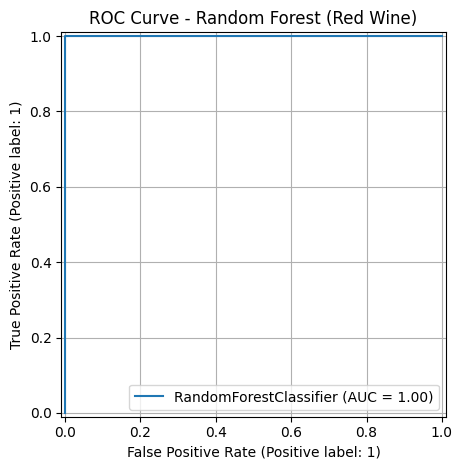


Random Forest AUC on White Wine: 1.0


In [5]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, RocCurveDisplay
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and Prepare Datasets
red_wine = pd.read_csv("red_wine.csv")
white_wine = pd.read_csv("white_wine.csv")

# Step 3: Simulate the 'quality' Column (since it's missing)
# Assumption: Wines with alcohol > 10 are considered 'high quality' (1), else 'low quality' (0)
red_wine['quality'] = red_wine['alcohol'].apply(lambda x: 1 if x > 10 else 0)
white_wine['quality'] = white_wine['alcohol'].apply(lambda x: 1 if x > 10 else 0)

# Step 4: Split Features and Labels
X_red = red_wine.drop(['quality', 'type'], axis=1)
y_red = red_wine['quality']
X_white = white_wine.drop(['quality', 'type'], axis=1)
y_white = white_wine['quality']

# Step 5: Define Models
models = {
    "Baseline": DummyClassifier(strategy='most_frequent'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True)),
    "SVM-RBF": make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True)),
    "Random Forest": RandomForestClassifier()
}

# Step 6: Run 10-Fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    auc = cross_val_score(model, X_red, y_red, cv=cv, scoring='roc_auc').mean()
    acc = cross_val_score(model, X_red, y_red, cv=cv, scoring='accuracy').mean()
    results[name] = {'AUC': auc, 'Accuracy': acc}

performance_df = pd.DataFrame(results).T
print("Cross-Validation Results:\n")
print(performance_df)

# Step 7: Train Best Model (Random Forest) and Plot ROC Curve
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest (Red Wine)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Test Best Model on White Wine
auc_white = roc_auc_score(y_white, rf_model.predict_proba(X_white)[:, 1])
print("\nRandom Forest AUC on White Wine:", auc_white)


In [2]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=914c89e0ba22be638024efdf280e6d1aae5fe690e75a96efc042cb2e670a9bad
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
